# Explore here

In [1]:
import warnings
from sklearn.exceptions import ConvergenceWarning
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.metrics import *
import matplotlib.pyplot as plt
import numpy as np
import requests
import missingno as msno
import xgboost as xgb
import seaborn as sns

In [2]:
url = "https://raw.githubusercontent.com/4GeeksAcademy/regularized-linear-regression-project-tutorial/main/demographic_health_data.csv"
response = requests.get(url).content.decode('utf-8')

file_name = '../data/raw/demographic_health_data.csv'

with open(file_name, 'w') as temp_file:
    temp_file.writelines(response)

In [3]:
df = pd.read_csv(file_name)
pd.set_option('display.max_columns', None)
df.head()

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,40-49,40-49 y/o % of total pop,50-59,50-59 y/o % of total pop,60-69,60-69 y/o % of total pop,70-79,70-79 y/o % of total pop,80+,80+ y/o % of total pop,White-alone pop,% White-alone,Black-alone pop,% Black-alone,Native American/American Indian-alone pop,% NA/AI-alone,Asian-alone pop,% Asian-alone,Hawaiian/Pacific Islander-alone pop,% Hawaiian/PI-alone,Two or more races pop,% Two or more races,POP_ESTIMATE_2018,N_POP_CHG_2018,GQ_ESTIMATES_2018,R_birth_2018,R_death_2018,R_NATURAL_INC_2018,R_INTERNATIONAL_MIG_2018,R_DOMESTIC_MIG_2018,R_NET_MIG_2018,Less than a high school diploma 2014-18,High school diploma only 2014-18,Some college or associate's degree 2014-18,Bachelor's degree or higher 2014-18,Percent of adults with less than a high school diploma 2014-18,Percent of adults with a high school diploma only 2014-18,Percent of adults completing some college or associate's degree 2014-18,Percent of adults with a bachelor's degree or higher 2014-18,POVALL_2018,PCTPOVALL_2018,PCTPOV017_2018,PCTPOV517_2018,MEDHHINC_2018,CI90LBINC_2018,CI90UBINC_2018,Civilian_labor_force_2018,Employed_2018,Unemployed_2018,Unemployment_rate_2018,Median_Household_Income_2018,Med_HH_Income_Percent_of_State_Total_2018,Active Physicians per 100000 Population 2018 (AAMC),Total Active Patient Care Physicians per 100000 Population 2018 (AAMC),Active Primary Care Physicians per 100000 Population 2018 (AAMC),Active Patient Care Primary Care Physicians per 100000 Population 2018 (AAMC),Active General Surgeons per 100000 Population 2018 (AAMC),Active Patient Care General Surgeons per 100000 Population 2018 (AAMC),Total nurse practitioners (2019),Total physician assistants (2019),Total Hospitals (2019),Internal Medicine Primary Care (2019),Family Medicine/General Practice Primary Care (2019),Total Specialist Physicians (2019),ICU Beds_x,Total Population,Population Aged 60+,Percent of Population Aged 60+,COUNTY_NAME,STATE_NAME,STATE_FIPS,CNTY_FIPS,county_pop2018_18 and older,anycondition_prevalence,anycondition_Lower 95% CI,anycondition_Upper 95% CI,anycondition_number,Obesity_prevalence,Obesity_Lower 95% CI,Obesity_Upper 95% CI,Obesity_number,Heart disease_prevalence,Heart disease_Lower 95% CI,Heart disease_Upper 95% CI,Heart disease_number,COPD_prevalence,COPD_Lower 95% CI,COPD_Upper 95% CI,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
0,1001,55601,6787,12.206615,7637,13.735364,6878,12.370281,7089,12.749771,7582,13.636445,7738,13.917016,5826,10.478229,4050,7.284042,2014,3.622237,42660,76.725239,10915,19.630942,267,0.480207,681,1.224798,62,0.111509,1016,1.827305,55601,158,455,11.8,9.6,2.2,0.0,0.7,0.6,4204,12119,10552,10291,11.3,32.6,28.4,27.7,7587,13.8,19.3,19.5,59338,53628,65048,25957,25015,942,3.6,59338,119.0,217.1,196.7,77.2,71.2,7.6,6.9,28.859137,6.085786,1.148905,25.992561,21.249061,72.142154,6,55036,10523,19.1,Autauga,Alabama,1,1,42438,47.6,45.4,49.4,20181,35.8,34.2,37.3,15193,7.9,7.2,8.7,3345,8.6,7.3,9.9,3644,12.9,11.9,13.8,5462,3.1,2.9,3.3,1326,3
1,1003,218022,24757,11.355276,26913,12.344167,23579,10.814964,25213,11.564429,27338,12.539102,29986,13.753658,29932,13.728890,20936,9.602701,9368,4.296814,190301,87.285228,19492,8.940382,1684,0.772399,2508,1.150343,146,0.066966,3891,1.784682,218022,5403,2190,10.5,10.3,0.1,0.5,24.3,24.8,14310,40579,46025,46075,9.7,27.6,31.3,31.3,21069,9.8,13.9,13.1,57588,54437,60739,93849,90456,3393,3.6,57588,115.5,217.1,196.7,77.2,71.2,7.6,6.9,113.162114,23.863512,4.505074,101.921730,83.321572,282.882982,51,203360,53519,26.3,Baldwin,Alabama,1,3,170912,40.2,38.2,42.3,68790,29.7,28.4,31.0,50761,7.8,7.0,8.7,13414,8.6,7.2,10.1,14692,12.0,11.0,13.1,20520,3.2,3.0,3.5,5479,4
2,1005,24881,2732,10.980266,2960,11.896628,3268,13.134520,3201,12.865239,3074,12.354809,3278,13.174712,3076,12.3

In [ ]:
#Buscamos registros duplicados, no hay.
print(df.duplicated().sum())

0


In [ ]:
#Obtenemos los valores únicos para averiguar si hay columnas que puedan ser binarias, no las hay.

n_unicos = df.nunique()
n_unicos

fips                      3140
TOT_POP                   3074
0-9                       2723
0-9 y/o % of total pop    3136
19-Oct                    2743
                          ... 
CKD_prevalence              43
CKD_Lower 95% CI            39
CKD_Upper 95% CI            46
CKD_number                1894
Urban_rural_code             6
Length: 108, dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140 entries, 0 to 3139
Columns: 108 entries, fips to Urban_rural_code
dtypes: float64(61), int64(45), object(2)
memory usage: 2.6+ MB


In [7]:
# No hay valores null
pd.set_option('display.max_rows', None,)
df.isnull().mean()*100

fips                                                                             0.0
TOT_POP                                                                          0.0
0-9                                                                              0.0
0-9 y/o % of total pop                                                           0.0
19-Oct                                                                           0.0
10-19 y/o % of total pop                                                         0.0
20-29                                                                            0.0
20-29 y/o % of total pop                                                         0.0
30-39                                                                            0.0
30-39 y/o % of total pop                                                         0.0
40-49                                                                            0.0
40-49 y/o % of total pop                                         

No hay valores nulos, por lo que no necesito usar el msno.matrix(df) para ver correlacciones, ni necesito quitar columnas, ni necesito rellenarlas por aproximación.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140 entries, 0 to 3139
Columns: 108 entries, fips to Urban_rural_code
dtypes: float64(61), int64(45), object(2)
memory usage: 2.6+ MB


In [49]:
# Procedo a factorizar las columnas que son objetos

df['STATE_NAME'].value_counts().reset_index()["STATE_NAME"]
df['STATE_NAME'].value_counts().reset_index()["count"]

#df['STATE_NAME_f'] 

states = df['STATE_NAME'].value_counts().reset_index()
countys = df['COUNTY_NAME'].value_counts().reset_index()


#func = lambda a: a.value_counts().reset_index()["count"] 

#print(list(map(lambda a: states["count"][a == states["STATE_NAME"]], df['STATE_NAME'])))

func = lambda a: a.loc[df["STATE_NAME"] == location] = df['STATE_NAME'].value_counts().get("STATE_NAME", 0)/len(df)*100

for location in df["neighbourhood"].unique():
    df.loc[df["neighbourhood"] == location, 'neighbourhood_f'] = df['neighbourhood'].value_counts().get(location, 0)/len(df)*100


'''
func = lambda a: a['STATE_NAME'].value_counts().tolist()
print(list(map(func, df['STATE_NAME'])))

#trial = list(map(func, df['STATE_NAME']))

'''

# 
# /df['STATE_NAME'].count()*100

SyntaxError: cannot assign to lambda (828483125.py, line 16)

In [58]:
df1 = df.drop(['STATE_NAME','COUNTY_NAME'], axis=1)

In [59]:
#Separamos la variable dependiente de las independientes (y las variables no factorizadas) con el nuevo dataframe 
X = df1.drop(['Heart disease_prevalence'], axis=1)
y = df1['Heart disease_prevalence']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [60]:
# Usamos xgb para conocer la importancia de las características
xgb_model = xgb.XGBClassifier(objective='reg:squarederror', random_state=42).fit(X_train, y_train)
df_imp = pd.DataFrame({'Feature':X_train.columns, 'Importance':xgb_model.feature_importances_*100})
df_imp = df_imp.sort_values(by='Importance', ascending=False)
print(df_imp)

ValueError: Invalid classes inferred from unique values of `y`.  Expected: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102], got [ 3.8  4.   4.1  4.2  4.3  4.4  4.5  4.6  4.7  4.8  4.9  5.   5.1  5.2
  5.3  5.4  5.5  5.6  5.7  5.8  5.9  6.   6.1  6.2  6.3  6.4  6.5  6.6
  6.7  6.8  6.9  7.   7.1  7.2  7.3  7.4  7.5  7.6  7.7  7.8  7.9  8.
  8.1  8.2  8.3  8.4  8.5  8.6  8.7  8.8  8.9  9.   9.1  9.2  9.3  9.4
  9.5  9.6  9.7  9.8  9.9 10.  10.1 10.2 10.3 10.4 10.5 10.6 10.7 10.8
 10.9 11.  11.1 11.2 11.3 11.4 11.5 11.6 11.7 11.8 11.9 12.  12.1 12.2
 12.3 12.4 12.5 12.6 12.7 12.8 12.9 13.  13.1 13.2 13.3 13.5 13.6 13.7
 13.8 13.9 14.5 14.8 15.1]

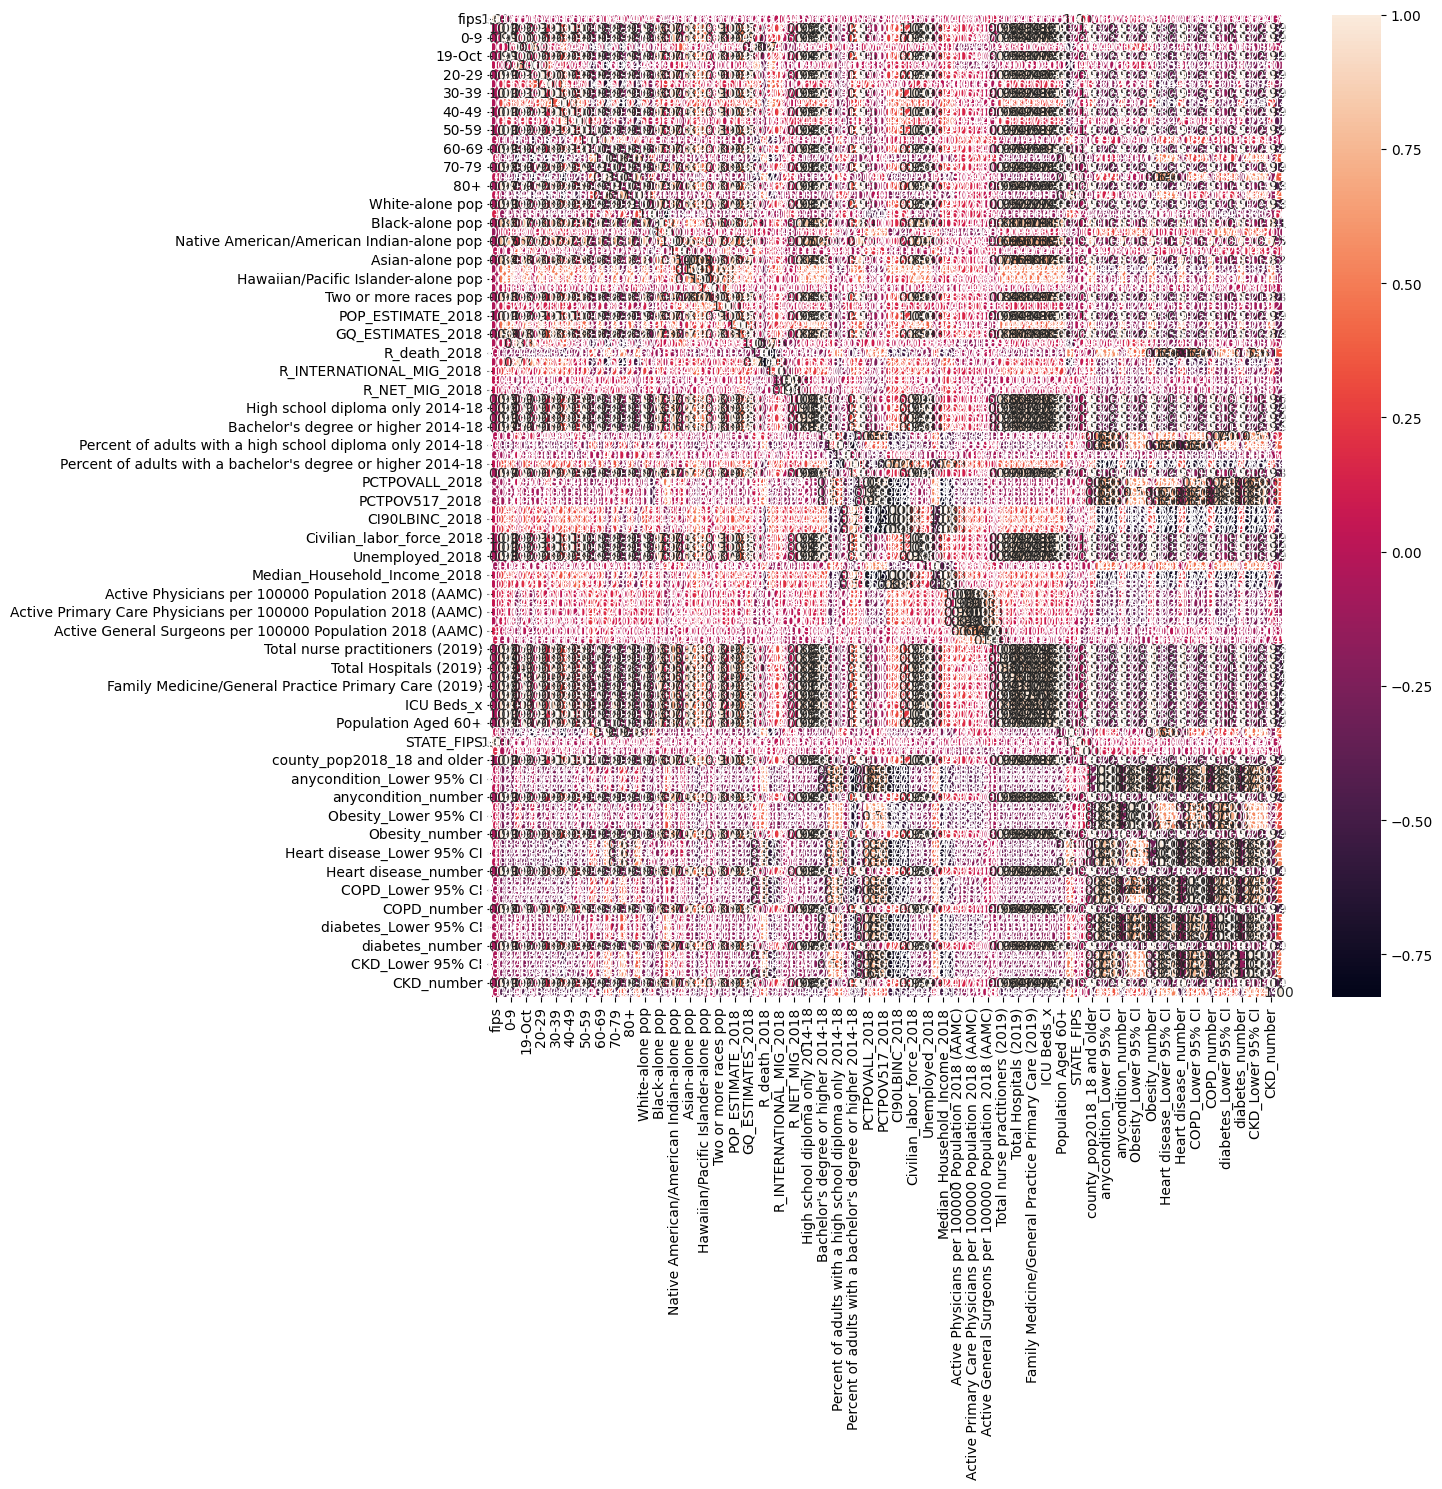

In [62]:
fig, axes = plt.subplots(figsize=(15, 15))

sns.heatmap(df1.corr(), annot = True, fmt = ".2f")

plt.tight_layout()
plt.show()